d:\Jupiter\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TEKTRONIX,DPO4034,C020996,CF:91.1CT FV:v2.30 DPO4COMP:V1.00 DPO4EMBD:V1.00  Connected
DC Power Supply 6705 at serial COM11 is open
TENMA 72-13210 V3.21 SN:00018436 connected
efficiency vs current
min_load0.05, max_load1, sample_num10,scalelog
output 5.2048 0.0487
input 12.1615 0.023
output 5.2025 0.0685
input 12.1535 0.033
output 5.2018 0.096
input 12.1461 0.046
output 5.1969 0.1348
input 12.1471 0.064
output 5.19 0.1874
input 12.1317 0.089
output 5.1723 0.2626
input 12.1184 0.124
output 5.1578 0.367
input 12.1028 0.174
output 5.1277 0.5125
input 12.0777 0.241
output 5.0629 0.7154
input 12.0301 0.334
output 4.8396 0.9984
input 11.8576 0.454
[0.25347376 0.35637125 0.4993728  0.70054212 0.972606   1.35824598
 1.8929126  2.62794625 3.62199866 4.83185664] [0.2797145 0.4010655 0.5587206 0.7774144 1.0797213 1.5026816 2.1058872
 2.9107257 4.0180534 5.3833504] [90.61874161 88.85612201 89.37791089 90.11180138 90.07935659 90.38814211
 89.88670428 90.28491589 90.14311905 89.75556635]
min_load0.05

KeyboardInterrupt: 

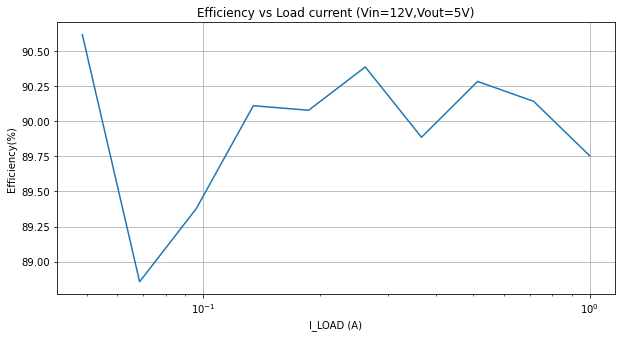

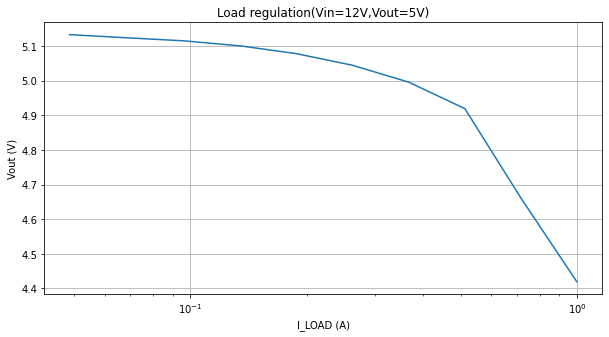

In [1]:
from PowerTester import *
pt=PowerTester('power_test.yaml')
pt.test_flow()

In [2]:
pt.power_supply.ser.close()

0.0001 1 10 linear
Vpp：0.13V


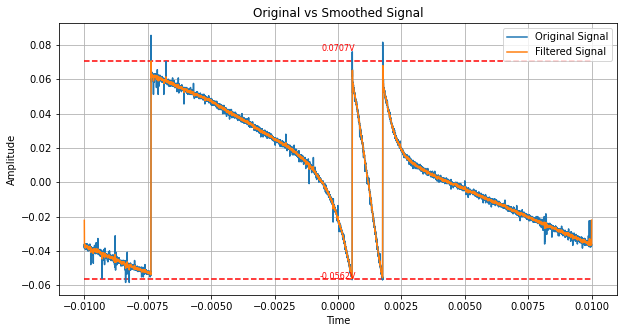

output 0.12688000000000002 0.0
Vpp：0.10V


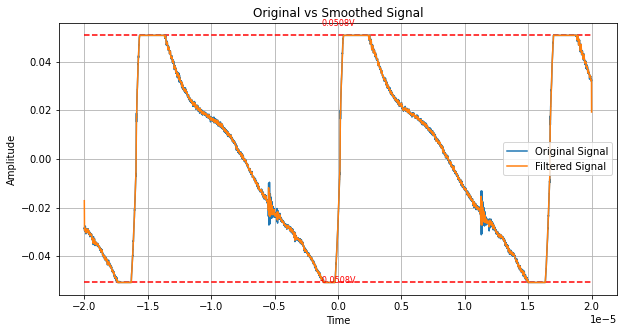

output 0.10160000000000002 0.1097
Vpp：0.14V


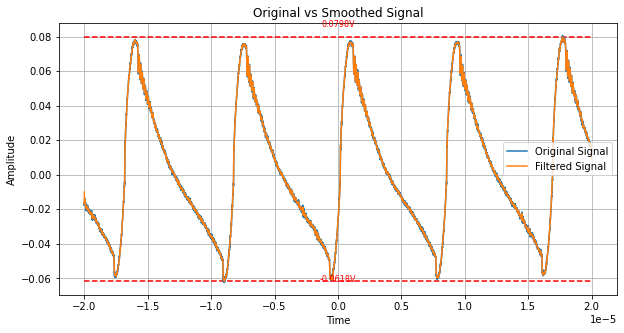

output 0.14160000000000003 0.2199
Vpp：0.14V


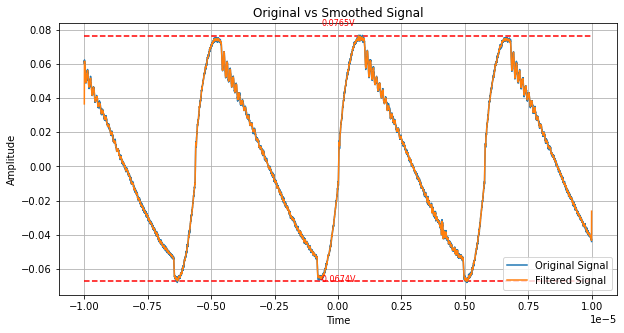

output 0.14384000000000002 0.3306
Vpp：0.12V


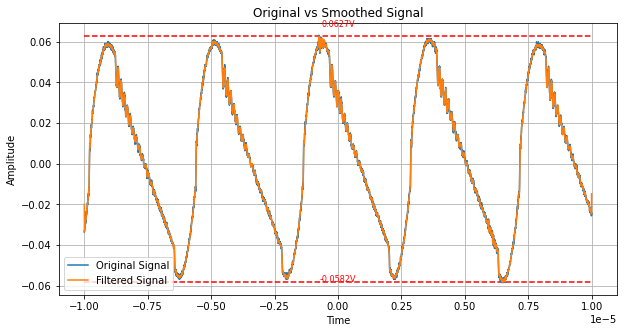

output 0.12096000000000001 0.4421
Vpp：0.11V


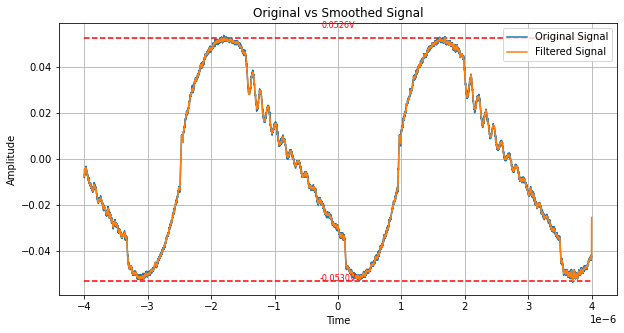

output 0.1056 0.5542
Vpp：0.10V


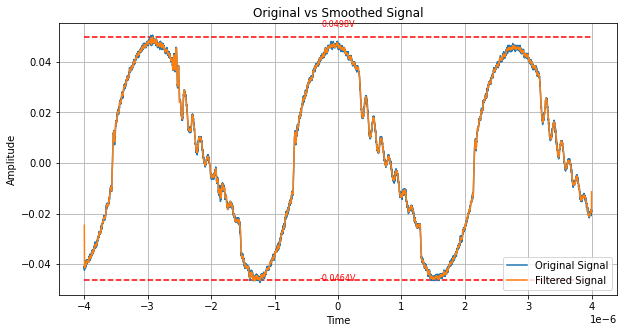

output 0.09616000000000002 0.6649
Vpp：0.09V


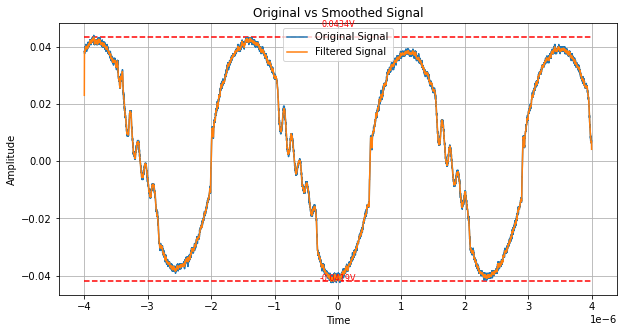

output 0.08528000000000001 0.7759
Vpp：0.08V


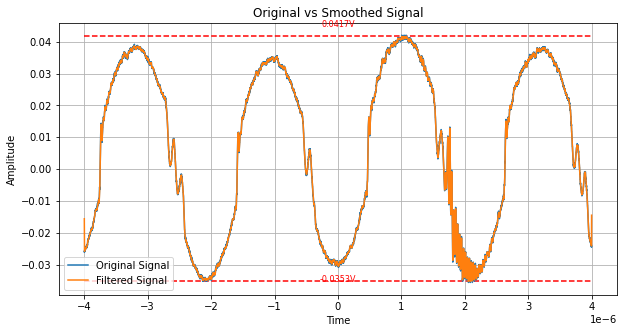

output 0.07696000000000001 0.8874
Vpp：0.07V


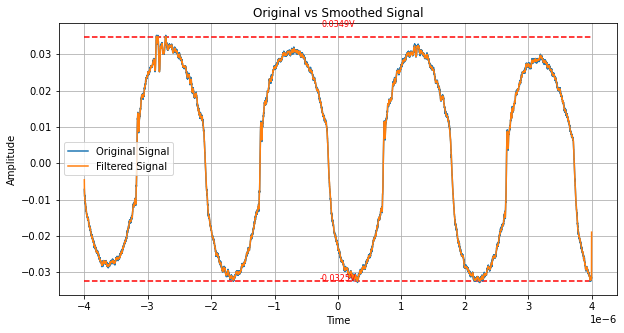

output 0.06736 0.9979


TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [7]:

sample_points,scale=pt.generate_sample_points('ripple')
pt.oscilloscope.set_acquire_mode('SAMple')
pt.oscilloscope.set_trigger_a_edge_coupling('AC')
pt.oscilloscope.set_trigger_a_edge_source(2)
pt.oscilloscope.set_bandwidth(2,'TWEnty')

pt.oscilloscope.set_t_scale(0.04)
#FIXME how to get precision
sample_points=np.round(sample_points,pt.load.get_precision())
vo_list,co_list,p_list=[],[],[]
for i in range (len(sample_points)):
    pt.load.set_mode('C',sample_points[i])
    time.sleep(2)
    #FIXME aaaaa
    pt.oscilloscope.auto_scale(2,False)
    output_c=pt.load.get_current_current()
    #FIXME how to get? wrong ripple measuremen!
    output_v=pt.oscilloscope.measure_ripple(2)
    print(f"output {output_v} {output_c}")
    vo_list.append(output_v)
    co_list.append(output_c)
    #FIXME
    w,t=pt.oscilloscope.get_waveform_data(2)
    data = np.vstack((w, t)).T
    name=f"waveform-current {output_c}A.txt"
    input("llll")
    #md 烦了


[2.5376000000000003, 2.0320000000000005, 2.8320000000000003, 2.8768000000000007, 2.4192, 2.112, 1.9232000000000007, 1.7056000000000002, 1.5392000000000003, 1.3472000000000002]


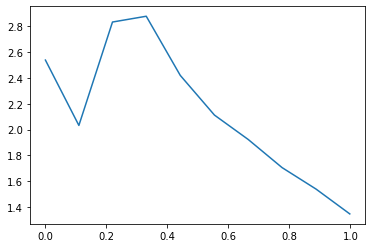

In [15]:
p_list=list()
for v in vo_list:
    p=v/5*100
    p_list.append(p)
#p_list=vo_list/vo*100 #ripple/output DC value
#debug
print(p_list)
plt.plot(co_list,p_list)

In [3]:
pt.test_flow()

0.0001 1 10 linear


KeyboardInterrupt: 